<h1>3030ICT Assignment</h1>

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('data.csv')

/Users/bendelaney/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [254]:
#check that data was properly loaded and get some initial information about the data
display(df.head(3))
df.info()
print('\nNa values:')
print(df.isna().sum())
print('\nDuplicated rows:', df.duplicated().sum())

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB

Na values:
Id                        0
Title                     0
Company               12004
Date                 

In [255]:
# remove duplicates
print('Duplicates before:',df.drop(columns=['Id']).duplicated().sum())
print(df.shape)
df.drop_duplicates(subset=df.columns.difference(['Id']), inplace=True)
print('\nDuplicates after:', df.drop(columns=['Id']).duplicated().sum())
print(df.shape)

Duplicates before: 8607
(318477, 13)

Duplicates after: 0
(309870, 13)


<h2>Part 1 – Data Preparation and Preprocessing. [15 points]</h2>

<h3>1. Describe the dataset. (8 points)</h3>

<ul>
    <li>Describe the dataset (e.g.: type of column, value range). (1 point) </li>
    <li>How many records are there in the dataset? (1 point) </li>
    <li>Which period does it cover? How many different dates have job postings? (1 point) </li>
    <li>How many locations does the dataset have? Which location has the most job postings? (1 point) </li>
    <li>How many job sectors(job classifications) are there in the dataset? List the name of each sector and its’ total of job postings. (1 point) </li>
    <li>Choose your favorite job sector (e.g. Information & Communication Technology), how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number. (1 point) </li>
    <li>List the salary ranges and their total of job postings. (1 point) </li>
    <li>List the job types. In each job type, what are the lowest salary and highest salary? (1 point)</li>
</ul>

In [256]:
#Ben

In [257]:
#Describe column types
print('\nColumn Types:\n') 
df.info()


Column Types:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309870 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 309870 non-null  object
 1   Title              309870 non-null  object
 2   Company            297942 non-null  object
 3   Date               309870 non-null  object
 4   Location           196293 non-null  object
 5   Area               122107 non-null  object
 6   Classification     196293 non-null  object
 7   SubClassification  196293 non-null  object
 8   Requirement        309863 non-null  object
 9   FullDescription    294280 non-null  object
 10  LowestSalary       309870 non-null  int64 
 11  HighestSalary      309870 non-null  int64 
 12  JobType            294353 non-null  object
dtypes: int64(2), object(11)
memory usage: 33.1+ MB


In [258]:
#Range for numerical values
print('\nRange and distribution of numerical columns (salary):\n') 
df.describe()


Range and distribution of numerical columns (salary):



,LowestSalary,HighestSalary
count,309870.000000,309870.000000
mean,65.462517,113.934289
std,50.995709,177.415993
min,0.000000,30.000000
25%,30.000000,40.000000
50%,60.000000,70.000000
75%,100.000000,120.000000
max,200.000000,999.000000


In [259]:
#Date range 
print('\nRange of dates:\nMin Date:',df.Date.min(),'\nMax Date',df.Date.max()) 
print('Number of days:',len(df.Date.unique()))


Range of dates:
Min Date: 2018-10-01T00:00:00.000Z 
Max Date 2019-03-13T00:00:00.000Z
Number of days: 163


In [260]:
#No. of records
print('\nNumber of job postings:\n',len(df.index)) 


Number of job postings:
 309870


In [261]:
#number of postings by location
df_locations = df.groupby(['Location'])['Location'].count()
print('\nNumber of job postings by location:\n',df_locations.sort_values(ascending=False))
print('\nTotal locations:', len(df_locations.index))
print(df_locations.sort_values(ascending=False).index[0],'has the most job postings with',df_locations.sort_values(ascending=False)[0],'jobs available')


Number of job postings by location:
 Location
Sydney                                  60462
Melbourne                               46483
Brisbane                                21350
Perth                                   13161
Adelaide                                 6611
                                        ...  
Yorke Peninsula & Clare Valley             94
Tumut, Snowy & Monaro                      86
Somerset & Lockyer                         65
Fleurieu Peninsula & Kangaroo Island       64
Central & South East TAS                   57
Name: Location, Length: 65, dtype: int64

Total locations: 65
Sydney has the most job postings with 60462 jobs available


In [262]:
#number of postings by job sectors
df_job_class = df.groupby(['Classification'], dropna=False)['Classification'].count()
print('\nPostings in each job sector:\n',df_job_class.sort_values(ascending=False))
print('\nTotal job sectors:', len(df_job_class.index))


Postings in each job sector:
 Classification
Information & Communication Technology    22715
Trades & Services                         17929
Healthcare & Medical                      17023
Hospitality & Tourism                     15498
Manufacturing, Transport & Logistics      12339
Administration & Office Support            9991
Accounting                                 9348
Education & Training                       9151
Construction                               8349
Sales                                      8092
Retail & Consumer Products                 8010
Government & Defence                       7200
Engineering                                6436
Mining, Resources & Energy                 6269
Banking & Financial Services               4616
Community Services & Development           4464
Legal                                      4227
Human Resources & Recruitment              4121
Marketing & Communications                 3964
Call Centre & Customer Service            

In [263]:
#number of sub sectors for Information & Communication Technology
df_info_comm_tech = df.loc[df['Classification'] == 'Information & Communication Technology']
df_info_subclass = df_info_comm_tech.groupby(['SubClassification'])['SubClassification'].count()
print('\nInformation & Communication Technology sub-sectors:\n',df_info_subclass.sort_values(ascending=False))
print('\nTotal Information & Communication Technology sub-sectors:', len(df_info_subclass.index))


Information & Communication Technology sub-sectors:
 SubClassification
Developers/Programmers                   4194
Business/Systems Analysts                2965
Programme & Project Management           2407
Architects                               1542
Engineering - Software                   1432
Help Desk & IT Support                   1372
Networks & Systems Administration        1192
Consultants                              1145
Other                                     996
Testing & Quality Assurance               827
Security                                  774
Management                                745
Engineering - Network                     551
Database Development & Administration     548
Web Development & Production              452
Sales - Pre & Post                        446
Product Management & Development          376
Telecommunications                        353
Team Leaders                              173
Engineering - Hardware                    116
Technica

In [264]:
#Job postings by salary range
df_salary_range = pd.DataFrame({'ranges': []})
df_salary_range['ranges']= df['LowestSalary'].astype(str)+'-'+df['HighestSalary'].astype(str)
df_salary_range_group = df_salary_range.groupby(['ranges'])['ranges'].count()
print('\nJob postings by salary ranges (min$-max$):\n',df_salary_range_group.sort_values(ascending=False))
print('\nTotal number of unique salary ranges:', len(df_salary_range_group.index))


Job postings by salary ranges (min$-max$):
 ranges
0-30       61140
40-50      33958
70-80      27950
60-70      27835
50-60      26534
100-120    26516
150-200    24885
120-150    23530
30-40      23302
80-100     23148
200-999    11072
Name: ranges, dtype: int64

Total number of unique salary ranges: 11


In [265]:
#Salary Ranges for job type:
print('\nMinimum salary for jobtypes\n',df.groupby('JobType')['LowestSalary'].min())
print('\nMaximum salary for jobtypes\n',df.groupby('JobType')['HighestSalary'].max())


Minimum salary for jobtypes
 JobType
Casual/Vacation    0
Contract/Temp      0
Full Time          0
Part Time          0
Name: LowestSalary, dtype: int64

Maximum salary for jobtypes
 JobType
Casual/Vacation    999
Contract/Temp      999
Full Time          999
Part Time          999
Name: HighestSalary, dtype: int64


<h3>2. Normalize and clean data. (7 points)</h3>

<ul>
    <li>The salaries are kept in the dataset as “HighestSalary” and “LowestSalary”. You should calculate the “AverageSalary” for each job. (1 point)</li>
    <li>The raw dataset values of the "Id" column had inconsistencies in their representation. The Id values should have 8 number long integers only. Write code to remove unnecessary characters. (1 point)</li>
    <li>The "Date" column is represented in a format that contained both date and time information. However, the time is not correct and should be removed. (1 point)</li>
    <li>Change type of “Id” column to numeric and change type of “Date” column to DateTime. (1 point) </li>
</ul>

In [266]:
#Julius

In [267]:
# 1.
df['AverageSalary'] = (df['HighestSalary'] + df['LowestSalary']) / 2
df.head(3)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0


In [268]:
# 2.
import re

print('Before:')
print(df['Id'].describe())

# single out only rows with ids not consisting of exactly 8 digits
irregularIdsDf = df[df['Id'].str.match(r'^(?!^\d{8}$).*$', na=False)] 
display(irregularIdsDf.head(3)) # see what the irregular ids look like
print('Shape before slicing: ', irregularIdsDf.shape) # see how many rows have irregular ids

df['Id'] = df['Id'].astype(str) # explicitly set type of Id column as string so each id is iterable
df['Id'] = [x[:8] for x in df['Id']] # reset the id to the first 8 characters of the id

# recheck to see if there are still some irregular ids
irregularIdsDf = df[df['Id'].str.match(r'^(?!^\d{8}$).*$', na=False)] 
print('Shape after slicing: ', irregularIdsDf.shape, '\n')

print('After:')
print(df['Id'].describe(), '\n')
print('Duplicated rows now:', df.duplicated(subset=['Id']).sum())

Before:
count                                                309870
unique                                               309870
top       37909726&searchrequesttoken=1044ecfa-41fb-4c31...
freq                                                      1
Name: Id, dtype: object


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
153767,37915260&searchrequesttoken=e859cc74-e22f-498d...,Shift Supervisor / Delivery Driver / Juniors,PIZZA HUT SOUTH MACKAY,2018-12-11T00:00:00.000Z,Mackay & Coalfields,NaN,Retail & Consumer Products,Management - Store,Shift Supervisor / Delivery Drivers / Juniors,NaN,0,30,NaN,15.0
153768,37915238&searchrequesttoken=e859cc74-e22f-498d...,Sales Support Administrator,Registry Australia,2018-12-11T00:00:00.000Z,Perth,"CBD, Inner & Western Suburbs",Administration & Office Support,Client & Sales Administration,Great opportunity to work at one of Australia'...,NaN,0,30,NaN,15.0
153769,37915306&searchrequesttoken=e859cc74-e22f-498d...,Part time Café All-rounder in Docklands,Jora Local,2018-12-11T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe/retail shop in Docklands is seeking a p...,NaN,0,30,NaN,15.0


Shape before slicing:  (43144, 14)
Shape after slicing:  (0, 14) 

After:
count       309870
unique      295902
top       37479306
freq             4
Name: Id, dtype: object 

Duplicated rows now: 13968


In [269]:
# drop duplicated rows
df.drop_duplicates(subset=['Id'], inplace=True)
print('Duplicated rows now:', df.duplicated(subset=['Id']).sum())
df.shape

Duplicated rows now: 0


(295902, 14)

In [270]:
# 3.
print('Before:')
print(df['Date'].describe())
display(df.head(1))

df['Date'] = pd.to_datetime(df['Date']) # convert to datetime
df['Date'] = df['Date'].dt.date # format to only date
#######################################################################################################################
########################################################################################################################
#Need to make to_datetime after dt.date otherwiser reverts back to object variable 
#######################################################################################################################
df['Date'] = pd.to_datetime(df['Date'])

print('After:')
print(df['Date'].describe())
display(df.head(1))

Before:
count                       295902
unique                         163
top       2018-10-17T00:00:00.000Z
freq                         12992
Name: Date, dtype: object


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0


After:
count                  295902
unique                    163
top       2018-10-17 00:00:00
freq                    12992
first     2018-10-01 00:00:00
last      2019-03-13 00:00:00
Name: Date, dtype: object


<ipython-input-270-5ebb5d801788>:11: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df['Date'].describe())


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0


In [271]:
# 4.
print('Before:')
print(df.dtypes, '\n')
df['Id'] = pd.to_numeric(df['Id'])
print('After:')
print(df.dtypes)

Before:
Id                           object
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object 

After:
Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      obje

<h2>Part 2 – Data Understanding. [5 points] </h2>

<ul>
    <li>Get the salary ranges using “AverageSalary”, the total jobs of each range and display them in the bar chart. (1 point)</li>
    <li>Display the list of job types and the number of jobs of each type using pie chart. (1 point)</li>
    <li>Display the list of job sectors and the number of jobs of each type using horizontal bar chart. (1 point)</li>
    <li>Choose your favorite location. Visualize the market share of that location in pie chart. (1 point)</li>
    <li>Can you find the salary distribution for the top 30 cities for the number of job postings? Visualize them in the boxplot chart. (1 point)</li>
</ul>

In [272]:
#1-3 -> Julius
#4-5 -> Ben

,AverageSalary,Count
0,15.0,61031
1,45.0,32290
2,75.0,26029
3,65.0,25624
4,110.0,25521
5,55.0,24744
6,175.0,23298
7,90.0,23098
8,35.0,22877
9,135.0,21494


Text(0, 0.5, 'Count')

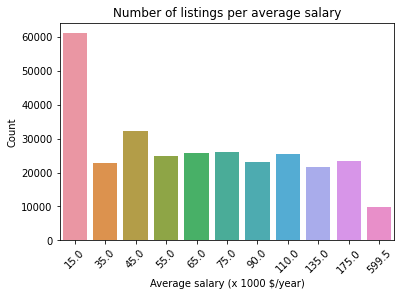

In [273]:
# 1.
# create a new dataframe with the occurances of each average salary value
salaryDistribution = df['AverageSalary'].value_counts().rename_axis('AverageSalary').reset_index(name='Count')
display(salaryDistribution)

salaryDistChart = sns.barplot(x="AverageSalary", y="Count", data=salaryDistribution)
salaryDistChart.set_xticklabels(salaryDistChart.get_xticklabels(), rotation=45)
plt.title('Number of listings per average salary')
plt.xlabel('Average salary (x 1000 $/year)')
plt.ylabel('Count')

List of unique job types:
[nan 'Full Time' 'Contract/Temp' 'Part Time' 'Casual/Vacation']


,JobType,Count
0,Full Time,186684
1,Contract/Temp,50348
2,Casual/Vacation,23921
3,Part Time,20447


Text(0.5, 1.0, 'Listings by job type')

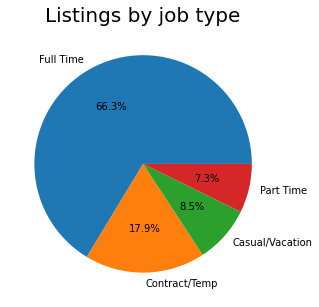

In [274]:
# 2.
print('List of unique job types:')
print(df['JobType'].unique())

typeDistribution = df['JobType'].value_counts().rename_axis('JobType').reset_index(name='Count')
display(typeDistribution)

fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(typeDistribution['Count'], labels=typeDistribution['JobType'], autopct='%1.1f%%')
plt.title('Listings by job type', size=20)

List of unique classifications:
['Retail & Consumer Products' 'Call Centre & Customer Service'
 'Hospitality & Tourism' 'Banking & Financial Services'
 'Manufacturing, Transport & Logistics' 'Sales'
 'Administration & Office Support' 'Trades & Services' 'Accounting'
 'Real Estate & Property' 'Healthcare & Medical'
 'Marketing & Communications' 'Government & Defence'
 'Information & Communication Technology' 'Education & Training'
 'Community Services & Development' 'Mining, Resources & Energy'
 'Human Resources & Recruitment' 'Insurance & Superannuation'
 'Engineering' 'CEO & General Management' 'Design & Architecture' 'Legal'
 'Construction' 'Sport & Recreation' 'Science & Technology'
 'Advertising, Arts & Media' 'Farming, Animals & Conservation'
 'Self Employment' 'Consulting & Strategy' nan]


,Classification,Count
0,Information & Communication Technology,20960
1,Trades & Services,16849
2,Healthcare & Medical,15733
3,Hospitality & Tourism,14346
4,"Manufacturing, Transport & Logistics",11541
5,Administration & Office Support,9440
6,Accounting,8682
7,Education & Training,8496
8,Construction,7718
9,Sales,7543


Text(0, 0.5, 'Classification')

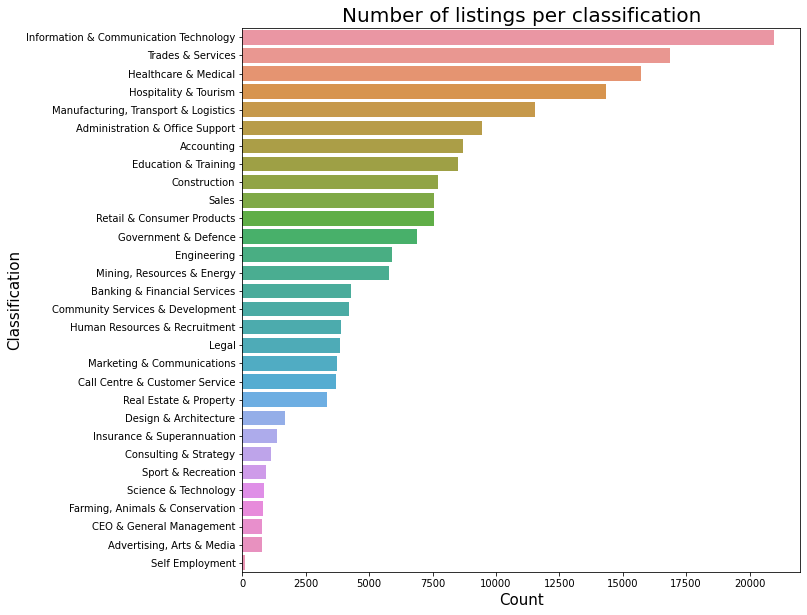

In [275]:
# 3.
print('List of unique classifications:')
print(df['Classification'].unique())

classificationDistribution = df['Classification'].value_counts().rename_axis('Classification').reset_index(name='Count')
display(classificationDistribution)

fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(ax=ax, data=classificationDistribution, x='Count', y='Classification')
plt.title('Number of listings per classification', size=20)
plt.xlabel('Count', size=15)
plt.ylabel('Classification', size=15)

,Location,Count
0,Sydney,56365
1,Melbourne,43202
2,Brisbane,19899
3,Perth,12156
4,Adelaide,6123
5,Gold Coast,3333
6,Others,41689


Text(0.5, 1.0, 'Job listings for top 5 locations and the Gold Coast')

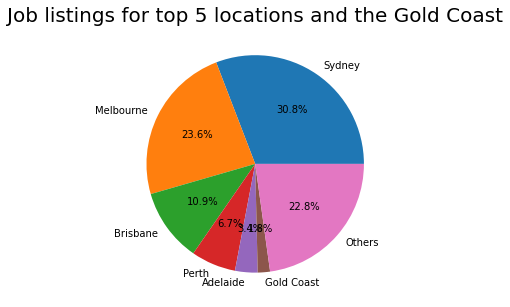

In [276]:
# 4.Choose your favorite location. Visualize the market share of that location in pie chart. (1 point)
favorite_location= 'Gold Coast'
top_x = 5

#Get counts for job listings in top 5 locations
df_location_share = df['Location'].value_counts().rename_axis('Location').reset_index(name='Count')
df_location_share = df_location_share.loc[:(top_x-1)]

#Refine to add favourite locations... Gold Coast
df_goldcoast = df.loc[df['Location'] == favorite_location]
df_goldcoast = df_goldcoast['Location'].value_counts().rename_axis('Location').reset_index(name='Count')
df_location_share = df_location_share.append(df_goldcoast, ignore_index = True)

#Add all other locations in their own category
top4_and_GC_locations=df_location_share['Location'].unique()
locations= df['Location'].unique()
otherlocations = []
for i in locations:
    if i not in top4_and_GC_locations:
            otherlocations.append(i)

df_otherlocations=df.loc[df['Location'].isin(otherlocations)]
df_otherlocations=df_otherlocations['Location'].value_counts().rename_axis('Location').reset_index(name='Count')
otherlocation_jobsum = df_otherlocations['Count'].sum()

#Display as data frame
df_location_share.loc[len(df_location_share.index)] = ['Others', otherlocation_jobsum]
display(df_location_share)

#Visualize as Pie Chart
fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(df_location_share['Count'], labels=df_location_share['Location'], autopct='%1.1f%%')
plt.title('Job listings for top 5 locations and the Gold Coast', size=20)

Text(0, 0.5, 'Average Salary')

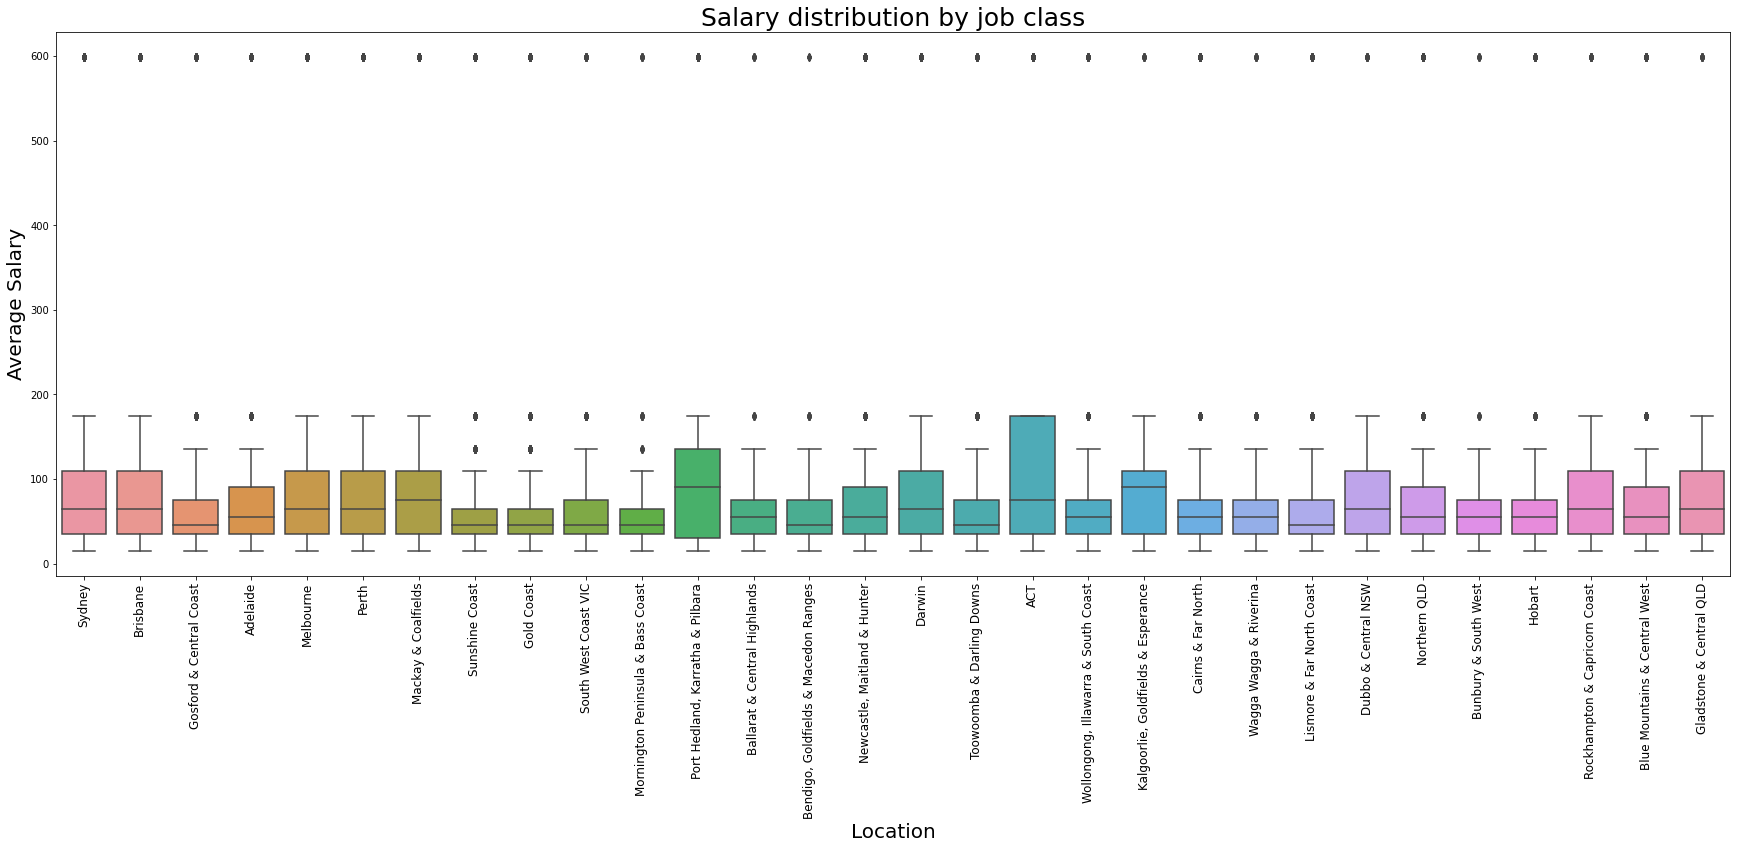

In [344]:
# 5.Can you find the salary distribution for the top 30 cities for the number of job postings? Visualize them in the boxplot chart.

#find top 30 locations ranked by job listings
top30locations=df.groupby(['Location'])['Location'].count().sort_values(ascending=False).index[:30]
df_top30locations=df.loc[df['Location'].isin(top30locations)]

#Create boxplot for average salarys from top 30 locations 
fig, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(ax=ax, data=df_top30locations, x='Location', y='AverageSalary')
plt.xticks(rotation=90, size=12)
plt.title('Salary distribution by job class', size=25)
plt.xlabel('Location', size=20)
plt.ylabel('Average Salary', size=20)


<h2>Part 3 – Data Analysis and Visualisation. [6 points]</h2>

<h3>1. Analyse by comparison. (2 points)</h3>

Choose your two favourite cities/locations. We will explore the difference between them by answering the following questions:
<ul>
    <li>Which city has more jobs? How many jobs each type (casual, fulltime, etc.) are there in each city? </li>
    <li>In each city, which are top 5 job sectors? How many jobs are there in each sector? </li>
    <li>Visualise the top 5 job sectors in pie chart for each city.* </li>
    <li>In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid? </li>
    <li>List top 5 companies in each city? Which sectors do they belong to? </li>
    <li>Between 2 cities, which do you think it is better for employees. Explain your choice.*</li>
<ul>

In [278]:
#1-3 -> Julius
#4-6 -> Ben

In [279]:
# We chose Brisbane and Adelaide
# 1.
brisbane = df.loc[df['Location'] == 'Brisbane'].copy()
adelaide = df.loc[df['Location'] == 'Adelaide'].copy()

print('Number of job listings in Brisbane:', brisbane.shape[0])
print('Number of job listings in Adelaide:', adelaide.shape[0], '\n')
print('Brisbane has more jobs.')

Number of job listings in Brisbane: 19899
Number of job listings in Adelaide: 6123 

Brisbane has more jobs.


In [280]:
brisbane['JobType'].fillna('Unspecified', inplace=True)
adelaide['JobType'].fillna('Unspecified', inplace=True)
brisbaneTypeDist = brisbane['JobType'].value_counts().rename_axis('JobType').reset_index(name='Count')
adelaideTypeDist = adelaide['JobType'].value_counts().rename_axis('JobType').reset_index(name='Count')

print('Brisbane:')
display(brisbaneTypeDist)

print('\nAdelaide:')
display(adelaideTypeDist)

Brisbane:


,JobType,Count
0,Full Time,12078
1,Contract/Temp,3813
2,Casual/Vacation,1760
3,Part Time,1128
4,Unspecified,1120



Adelaide:


,JobType,Count
0,Full Time,3638
1,Contract/Temp,982
2,Casual/Vacation,730
3,Part Time,467
4,Unspecified,306


In [281]:
# 2.
brisbane['Classification'].fillna('Unspecified', inplace=True)
adelaide['Classification'].fillna('Unspecified', inplace=True)
brisbaneClassificationDist = brisbane['Classification'].value_counts().rename_axis('Classification').reset_index(name='Count')
adelaideClassificationDist = adelaide['Classification'].value_counts().rename_axis('Classification').reset_index(name='Count')

print('Brisbane:')
display(brisbaneClassificationDist.head())

print('\nAdelaide:')
display(adelaideClassificationDist.head())

Brisbane:


,Classification,Count
0,Information & Communication Technology,2550
1,Trades & Services,1896
2,Healthcare & Medical,1680
3,"Manufacturing, Transport & Logistics",1563
4,Hospitality & Tourism,1237



Adelaide:


,Classification,Count
0,Trades & Services,761
1,Healthcare & Medical,728
2,"Manufacturing, Transport & Logistics",518
3,Information & Communication Technology,479
4,Hospitality & Tourism,461


Text(0.5, 1.0, 'Listings by classification (Adelaide)')

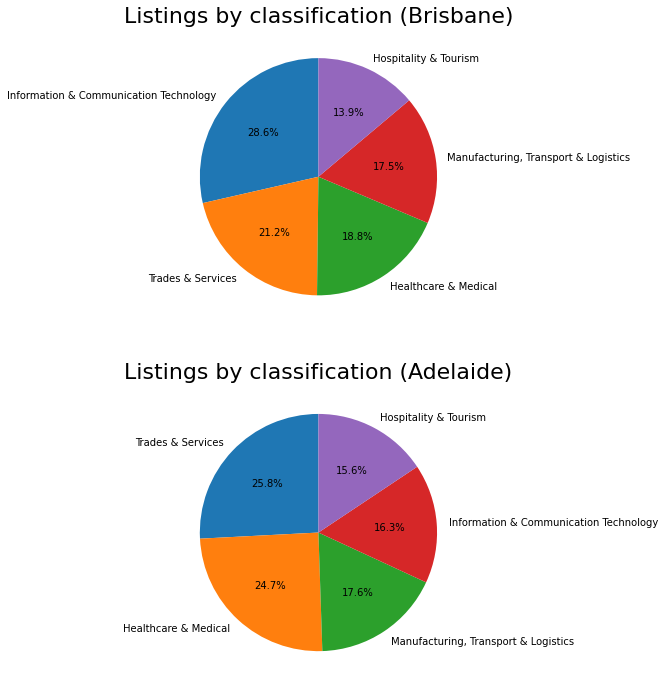

In [282]:
# 3.
brisbaneTop5Classification = brisbaneClassificationDist.sort_values('Count', ascending = False).head(5)
adelaideTop5Classification = adelaideClassificationDist.sort_values('Count', ascending = False).head(5)

fig, axs = plt.subplots(2, 1, figsize=(12, 12))

axs[0].pie(brisbaneTop5Classification['Count'], labels=brisbaneTop5Classification['Classification'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Listings by classification (Brisbane)', size=22)

axs[1].pie(adelaideTop5Classification['Count'], labels=adelaideTop5Classification['Classification'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Listings by classification (Adelaide)', size=22)

In [306]:
#4.In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid?
#Create new data frame with all cities avereage lowest and highest salarys and job listings count:
df_lowsalary = pd.DataFrame(df.groupby(['Location'])['LowestSalary'].mean())
df_highsalary = pd.DataFrame(df.groupby(['Location'])['HighestSalary'].mean())
df_joblisting = pd.DataFrame(df.groupby(['Location'])['Location'].count())
df_merged = df_lowsalary.merge(df_highsalary, how='outer', left_index=True, right_index=True)
df_merged = df_merged.merge(df_joblisting, how='outer', left_index=True, right_index=True)
df_merged.rename(columns = {'Location':'Total job listings','LowestSalary':'Average lowest salary','HighestSalary':'Average highest salary'}, inplace = True)

#Refine to just cities specified:
print('Mean slarys for Brisbane and Adelaide:\n')
df_merged.loc[df_merged.index.isin(['Brisbane','Adelaide'])].sort_values('Average highest salary',ascending = False)



Mean slarys for Brisbane and Adelaide:



,Average lowest salary,Average highest salary,Total job listings
Location,,,
Brisbane,64.000201,116.859993,19899
Adelaide,55.951331,93.235669,6123


# Analysis
Of the two cities Brisbane has a higher avergae salary for both lowest and highest average salarys in each listing. Brisbane also has more job listings than Adelaide.

In [311]:
#5.List top 5 companies in each city? Which sectors do they belong to?
#Create data frams for each city with top 5 companies by job listing count
df_jobs_adelaide = pd.DataFrame(df.loc[df['Location'] == 'Adelaide'].groupby(['Company'])['Company'].count().sort_values(ascending = False).head(5))
df_jobs_brisbane = pd.DataFrame(df.loc[df['Location'] == 'Brisbane'].groupby(['Company'])['Company'].count().sort_values(ascending = False).head(5))
df_jobs_adelaide.rename(columns = {'Company':'Job Listings'}, inplace = True)
df_jobs_brisbane.rename(columns = {'Company':'Job Listings'}, inplace = True)
#Obtain company classification from job data and append to array to add to top companies:
x_adelaide=[]
for i in df_jobs_adelaide.index:
    y = (df.loc[df['Company'] == i]['Classification'].head(1))
    x_adelaide.append(y.values)
df_jobs_adelaide['Classification']= x_adelaide

x_brisbane=[]
for i in df_jobs_brisbane.index:
    y = (df.loc[df['Company'] == i]['Classification'].head(1))
    x_brisbane.append(y.values)
df_jobs_brisbane['Classification']= x_brisbane


In [313]:
print('\nTop companies in Brisbane:\n')
df_jobs_brisbane


Top companies in Brisbane:



,Job Listings,Classification
Company,,
Jora Local,291,[Hospitality & Tourism]
Hudson,250,[Accounting]
u&u. Recruitment Partners,243,[Accounting]
The University of Queensland,215,[Education & Training]
Programmed Skilled Workforce,200,[Trades & Services]


In [312]:
print('\nTop companies in Adelaide:\n')
df_jobs_adelaide


Top companies in Adelaide:



,Job Listings,Classification
Company,,
Jora Local,122,[Hospitality & Tourism]
S.A. Health,118,[Government & Defence]
Excel Recruitment,53,"[Manufacturing, Transport & Logistics]"
Hudson,48,[Accounting]
University of South Australia,47,[Education & Training]


# #6.Between 2 cities, which do you think it is better for employees. Explain your choice.*
From this analysis it is evident that the most beneficial citiy for employees is Brisbane. They have significantly more job listings. The most popular sector in regard to listings is Information and Communication Technology which also has a larger share of the market in Brisbane than Adelaide. Finally the average lowest salary and average highest salary for job listings were both higher in Brisbane making it overall a better place for employees


<h3>2. Analyse by time. (2 points) </h3>

In this part, we will analyse the jobs based on the posting date. 
<ul>
    <li>Visualise the number of job posts by month</li>
    <li>Visualise the number of job posts by day of week.</li>
    <li>Visualise the number of job posts by day of the month.</li>
    <li>Visualise trending of the job postings for the big cities.*</li>
    <li>Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion.</li>
</ul>

In [286]:
#Ben

Text(0.5, 1.0, 'Job listings by month')

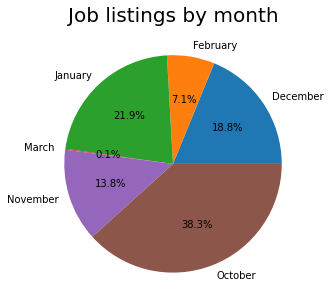

In [287]:
#1.Visualise the number of job posts by month
#Get the names of each month number wit month_name and store:
df_months = df.copy()
df_months['month_full'] = df_months['Date'].dt.month_name()
df_months
df_months = pd.DataFrame(df_months.groupby(['month_full'])['month_full'].count())
#Plot with pie chart:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(df_months['month_full'], labels=df_months.index, autopct='%1.1f%%')
plt.title('Job listings by month', size=20)


Text(0.5, 1.0, 'Job listings by day of the week')

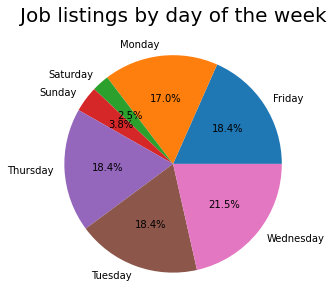

In [288]:
#2.Visualise the number of job posts by day of the week
#Get the names of each day number with day_name and store:
df_days = df.copy()
df_days['day_full'] = df_days['Date'].dt.day_name()
df_days
df_days = pd.DataFrame(df_days.groupby(['day_full'])['day_full'].count())
#Plot with pie chart:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(df_days['day_full'], labels=df_days.index, autopct='%1.1f%%')
plt.title('Job listings by day of the week', size=20)

Text(0.5, 1.0, 'Job listings by day of the month')

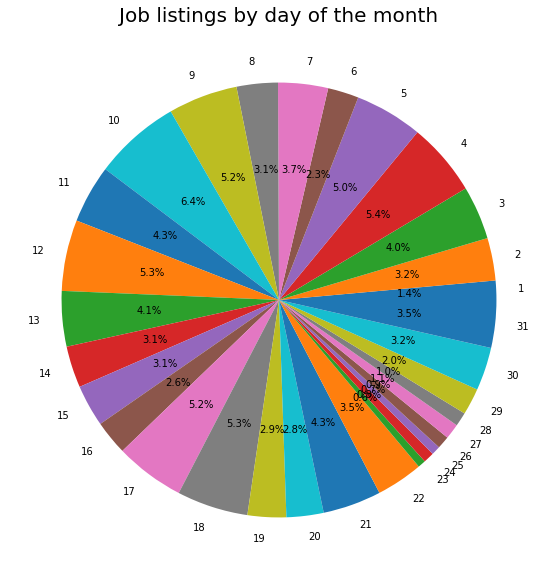

In [289]:
#3.Visualise the number of job posts by day of the month
#Store counts for each day of the month:
df_dayofmonth = df.copy()
df_dayofmonth['day_month'] = df_dayofmonth['Date'].dt.day
df_dayofmonth
df_dayofmonth = pd.DataFrame(df_dayofmonth.groupby(['day_month'])['day_month'].count())
#Plot with Pie chart:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(df_dayofmonth['day_month'], labels=df_dayofmonth.index, autopct='%1.1f%%')
plt.title('Job listings by day of the month', size=20)

Text(0, 0.5, 'Count')

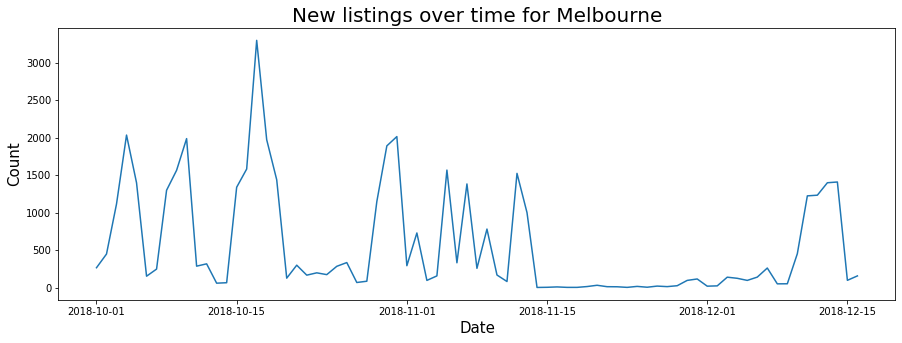

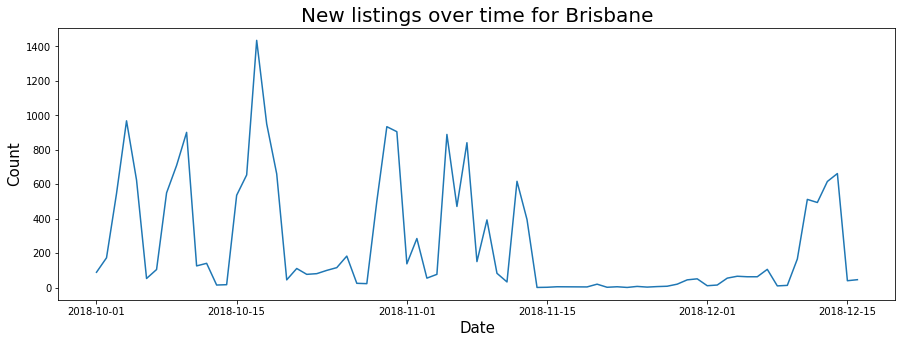

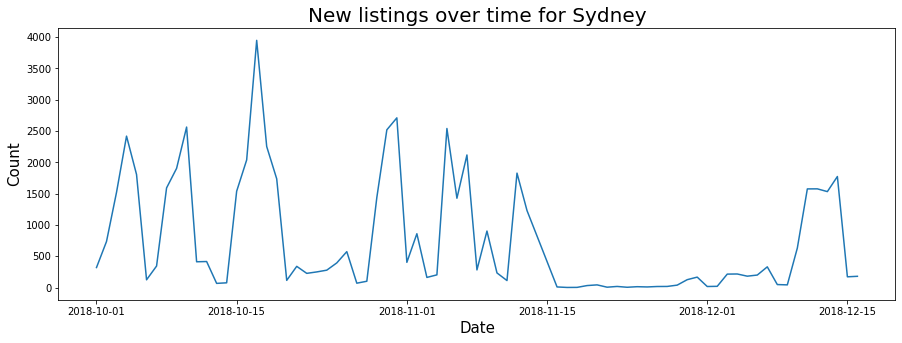

In [342]:
#4.Visualise trending of the job postings for the big cities.*
#Create seperate dataframes for each city being analysed with the counts of job listings each day in those locations: 
dateDistribution = df.copy()

dateDistribution_mel = dateDistribution.loc[dateDistribution['Location']=='Melbourne']
dateDistribution_mel = dateDistribution_mel['Date'].value_counts().rename_axis('Date').reset_index(name='Count')
dateDistribution_mel.sort_values(by='Date', inplace=True, ignore_index=True)

dateDistribution_bris = dateDistribution.loc[dateDistribution['Location']=='Brisbane']
dateDistribution_bris = dateDistribution_bris['Date'].value_counts().rename_axis('Date').reset_index(name='Count')
dateDistribution_bris.sort_values(by='Date', inplace=True, ignore_index=True)

dateDistribution_sydney = dateDistribution.loc[dateDistribution['Location']=='Sydney']
dateDistribution_sydney = dateDistribution_sydney['Date'].value_counts().rename_axis('Date').reset_index(name='Count')
dateDistribution_sydney.sort_values(by='Date', inplace=True, ignore_index=True)

#Plot the job listings over time for each city using a line plot:
#Melbourne
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(ax=ax, data=dateDistribution_mel, x='Date', y='Count')
plt.title('New listings over time for Melbourne', size=20)
plt.xlabel('Date', size=15)
plt.ylabel('Count', size=15)
#Brisbane
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(ax=ax, data=dateDistribution_bris, x='Date', y='Count')
plt.title('New listings over time for Brisbane', size=20)
plt.xlabel('Date', size=15)
plt.ylabel('Count', size=15)
#Sydney
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(ax=ax, data=dateDistribution_sydney, x='Date', y='Count')
plt.title('New listings over time for Sydney', size=20)
plt.xlabel('Date', size=15)
plt.ylabel('Count', size=15)

In [343]:
#Show how Location of listings after 2018 are all null: 
dates_after2018 = df.loc[df['Date']>'2018-12-31']
print('Unique locations after 2018:', dates_after2018.Location.unique(),'\nNumber of listings after 2018:', len(dates_after2018.Location))

Unique locations after 2018: [nan] 
Number of listings after 2018: 86086


# 5. Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion.
Between cities the listings of jobs over time are very similar and peak very similarly at the same times. It was noticed that the listings for jobs had very significant spikes at certain months of the year and almost no listings for other months. By analysing these months it was found that there where litlle to no job listings between April-September and then a huge spike in October. October accounted for over a third of all job listings. This distribuition of job listsings does not seem consistant with a normal job market. Further analysis into why the job listings are temporaly distributed like thic could be done. Potential reasons could allignment with certain key dates for buisnesses to bring in new employees. It should also be noted that job listinsg after from 2019 onwards have null Location values and therfore cannot be determined for the big cities. They can however be used for all job listings over time as explored later.

<h3>3. Forecasting and skill extractions. (2 points)</h3>

<ul>
    <li>Using moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart. Which one creates a better prediction? Explain your choice.**</li>
    <li>Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords. Visualise them in word cloud chart (hint: you can use the online tool https://wordart.com/create or similar websites)**.</li>
</ul>


In [292]:
#Julius

Text(0, 0.5, 'Count')

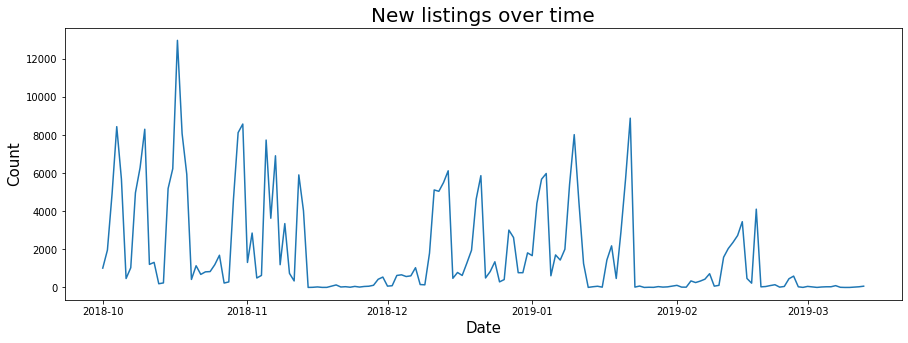

In [293]:
# 1.
dateDistribution = df.copy()

dateDistribution = dateDistribution['Date'].value_counts().rename_axis('Date').reset_index(name='Count')
dateDistribution.sort_values(by='Date', inplace=True, ignore_index=True)

fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(ax=ax, data=dateDistribution, x='Date', y='Count')
plt.title('New listings over time', size=20)
plt.xlabel('Date', size=15)
plt.ylabel('Count', size=15)

In [294]:
def get_moving_average(data, k, to_period):
    ma_df = pd.DataFrame(columns=['Date','Count'])
    for m in range(0, to_period):
        if m < k:
            prediction = float('nan')
        else:
            history = data['Count'][m-k:m]
            prediction = history.mean()
        ma_df.loc[m] = [data.Date[0] + pd.Timedelta(days=m+1), prediction]       
    return ma_df

Text(0, 0.5, 'Count')

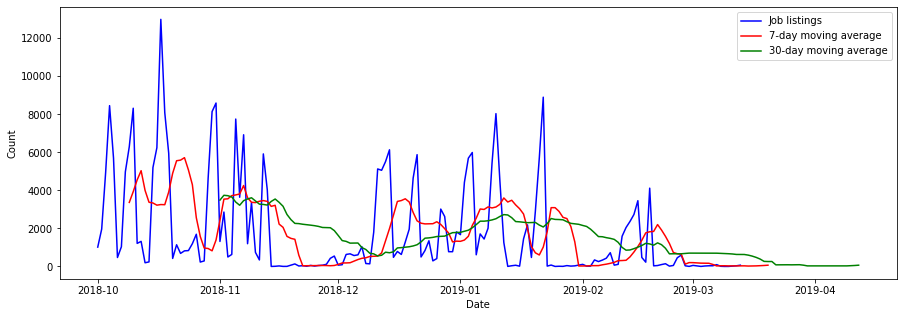

In [295]:
periodLength = dateDistribution.shape[0]

seven_day_ma = get_moving_average(dateDistribution, 7, periodLength+7)
thirty_day_ma = get_moving_average(dateDistribution, 30, periodLength+30)

fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(ax=ax, data=dateDistribution, x='Date', y='Count', color='b')
sns.lineplot(ax=ax, data=seven_day_ma, x='Date', y='Count', color='r')
sns.lineplot(ax=ax, data=thirty_day_ma, x='Date', y='Count', color='g')

ax.legend(labels=["Job listings", "7-day moving average", "30-day moving average"])
ax.set_xlabel('Date')
ax.set_ylabel('Count')

<h2>Part 4 – Discussion. [4 points] </h2>

<ul>
    <li><strong>Scenario 1:</strong> Tom, a grade 12 student in Brisbane, has good results in all of the subjects in his school. He is finding a major in the University which can guarantee a job in his state (Queensland) with a good income (>=80K) in the future. Based on the current job market dataset, which major and the related subjects do you recommend him? Explain your choice.*** ( Max 750 words) </li>
    <li><strong>Scenario 2:</strong> To gain a better reputation, Griffith University wants to attract more students by enhancing the employability of the graduates. As a data analyst, you need to give the recommendation for the management board for the changing of the admission numbers in each major. Which majors should be extended, and which majors should be reduced (Assume that we only need to use job market data, regardless of other factors such as social impact, economic impact, etc. )? Justify your recommendation.*** ( Max 750 words)</li>
</ul>

In [296]:
#1 -> Ben
#2 -> Julius

# Scenario 1:
To pick a major and related subjects for Tom, all relevant locations and sectors should be analysed to find the most suitable fit for him. Firstly, the data set of job postings was refined to just jobs posted in Queensland. Secondly all postings with an average yearly salary of less than $80,000 a year were removed as per Tom’s future income requirements. Now the data includes only job listings that suit Tom’s specifications.

Text(0, 0.5, 'Classification')

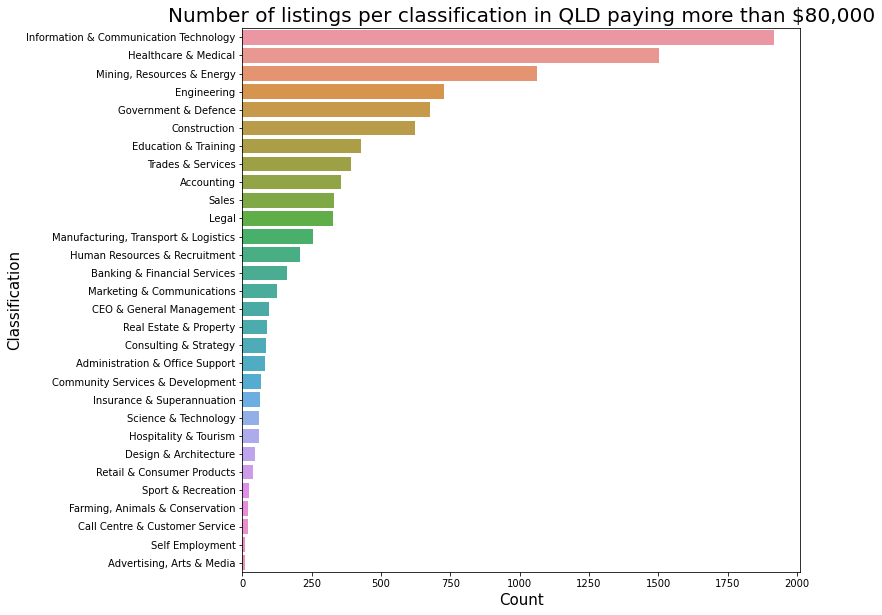

In [317]:
#Refine data to QLD >=80k
df_qld_80k = df.copy()
df_qld_80k = df_qld_80k.loc[df_qld_80k['Location'].isin(['Brisbane','Mackay & Coalfields','Sunshine Coast','Gold Coast','Hervey Bay & Fraser Coast','Toowoomba & Darling Downs','Cairns & Far North','Northern QLD','Rockhampton & Capricorn Coast','Gladstone & Central QLD','Somerset & Lockyer','Western QLD','Bundaberg & Wide Bay Burnett'])]
df_qld_80k = df_qld_80k.loc[df_qld_80k['AverageSalary']>=80]

classificationDistribution = df_qld_80k['Classification'].value_counts().rename_axis('Classification').reset_index(name='Count')
#display(classificationDistribution)

#Plot data in bar chart
fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(ax=ax, data=classificationDistribution, x='Count', y='Classification')
plt.title('Number of listings per classification in QLD paying more than $80,000', size=20)
plt.xlabel('Count', size=15)
plt.ylabel('Classification', size=15)



# Top job sectors
As Tom wishes to be guaranteed a job, the total number of job listings available in each sector is very relevant to picking his degree and subjects. The sector with the most suitable job listings is Information & Communication Technology. With almost 2000 job postings in Queensland above $80,000 a year, a degree relating to this sector would like to prove very beneficial in finding an appropriate job. A degree such as computer science, Information Technology or Software Engineering could all be good choices to get into this sector. The sector with the 2nd most job listings is Healthcare & Medical. To achieve a career in this field potential degrees, include Nursing, Dentistry, Psychology or a pre-med course that can lead to being a qualified practitioner with the addition of medical school. Mining Resources and Energy is the third ranking sector by number of suitable jobs with over 1000 listings. Degrees suitable for this sector could include Engineering, Industrial Design and Environmental Science. Although other sectors do have suitable job listings available, it is recommended that Tom restricts his studies to one of these top 3 sectors to guarantee a position when he completes his degree. But to better determine the decision for major and subjects, an analysis of most common subsectors in each field should be done.  

In [298]:
#Refine to top 3 Job Classifications
df_qld_80k_tech = df_qld_80k.loc[df_qld_80k['Classification'] == 'Information & Communication Technology']
df_qld_80k_health = df_qld_80k.loc[df_qld_80k['Classification'] == 'Healthcare & Medical']
df_qld_80k_mining = df_qld_80k.loc[df_qld_80k['Classification'] == 'Mining, Resources & Energy']
classificationDistribution_tech = df_qld_80k_tech['SubClassification'].value_counts().rename_axis('SubClassification').reset_index(name='Count')
classificationDistribution_health = df_qld_80k_health['SubClassification'].value_counts().rename_axis('SubClassification').reset_index(name='Count')
classificationDistribution_mining = df_qld_80k_mining['SubClassification'].value_counts().rename_axis('SubClassification').reset_index(name='Count')

Text(0, 0.5, 'SubClassification')

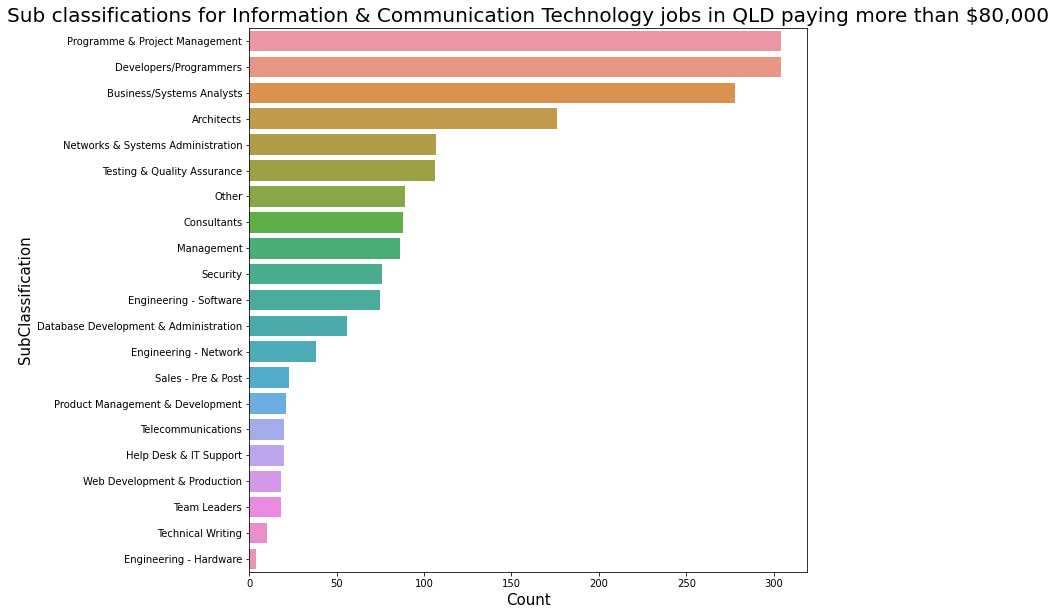

In [318]:
#Plot info & comm sub sectors
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(ax=ax, data=classificationDistribution_tech, x='Count', y='SubClassification')
plt.title('Sub classifications for Information & Communication Technology jobs in QLD paying more than $80,000', size=20)
plt.xlabel('Count', size=15)
plt.ylabel('SubClassification', size=15)

# Information and Communication Technology:
By visualizing each subsector by their total job listings, it was found the highest-ranking subsector was a tie between programme and project management as well as programmer/ developer. A key distinction between these two is project management roles often require more employment experience and employment is unlikely immediately upon completion of a degree unlike program/development. 
Assuming the programme and project management job listings are primarily software projects rather than developing new hardware (likely considered product management and development), suitable degrees would be Computer Science and Software Engineering. For this field, choosing subjects that develop business and leadership skills should be prioritized.
To be a programme developer the degrees Computer Science and Software Engineering are also very relevant. However, when picking subjects more technically specific subjects can be prioritized that develop an in-depth understanding of programming languages and software creation. 


Text(0, 0.5, 'SubClassification')

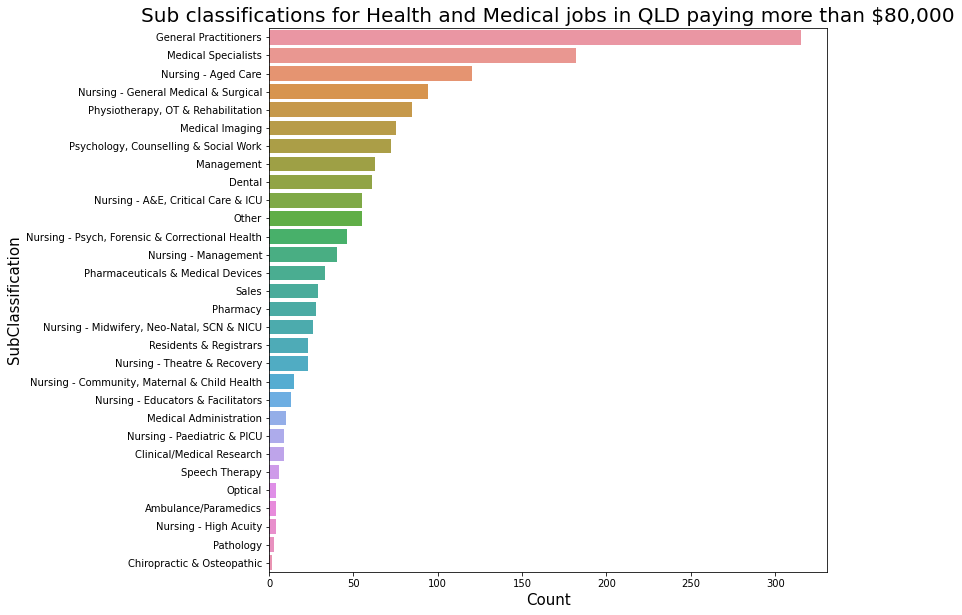

In [319]:
#Plot health sub sectors
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(ax=ax, data=classificationDistribution_health, x='Count', y='SubClassification')
plt.title('Sub classifications for Health and Medical jobs in QLD paying more than $80,000', size=20)
plt.xlabel('Count', size=15)
plt.ylabel('SubClassification', size=15)

# Health and Medical
The two highest ranking subsectors in Health and Medical are general practitioners and medial specialist. Both of these felids likely require extensive studies and being registered as a qualified doctor. This narrows the choice for study options and going to medical school mandatory. If Tom wishes to work in the Health and Medical sector without becoming a doctor, then nursing also ranks highly in job listings. This field offers less intensive studies with good employment opportunities. In selecting subjects, it could be beneficial to prioritize aged care related subjects, as that fields ranks highest in job listings for nurses.

Text(0, 0.5, 'SubClassification')

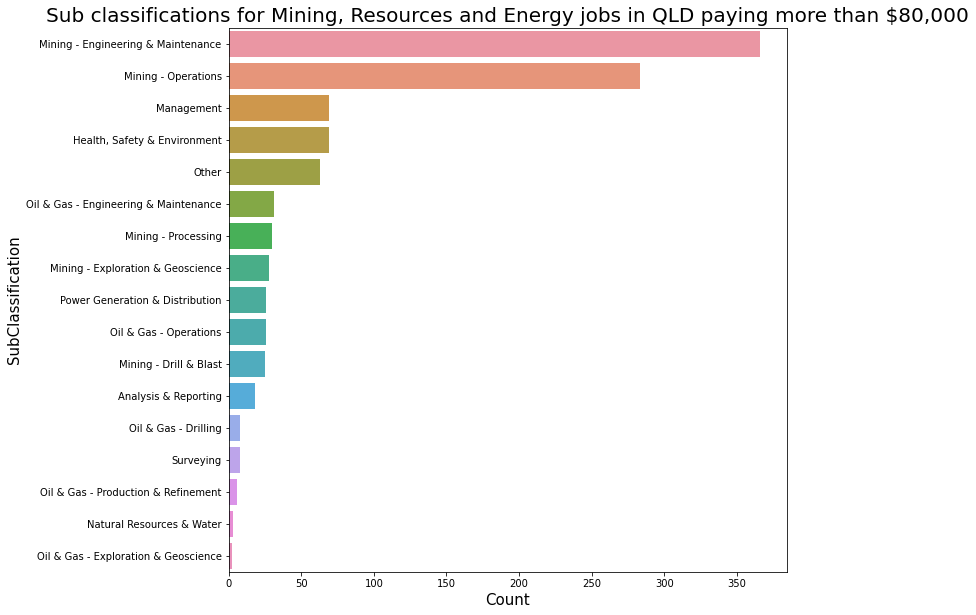

In [320]:
#Plot mining sub sectors
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(ax=ax, data=classificationDistribution_mining, x='Count', y='SubClassification')
plt.title('Sub classifications for Mining, Resources and Energy jobs in QLD paying more than $80,000', size=20)
plt.xlabel('Count', size=15)
plt.ylabel('SubClassification', size=15)

# Mining, Resources and Energy
If a career in Mining, Resources and Energy is desired the two highest ranking subsectors are Mining-engineering and maintenance and mining operations. Mining engineering and maintenance has more jobs listed than any other subsector previously discussed. Suitable degrees for this field include Engineering or a Mechanic (specifically industrial machines). In determining subjects any relevant to mining or resource extraction should be prioritized. In the field of mining operations, the same degrees are still appropriate but course selection should be focused on team management and leadership. Also, subjects related to earth science and geology could be considered rather than just technical engineering subjects.

# Summary:
If Tom wishes to prioritize a degree that will guarantee to a job immediately upon completion, then a Software Engineering or Computer Science degree that develops specific technical skill would be highly recommended. Being a programmer/ developer also makes it easy to transition other more managerial roles or general information technology careers which from analysis have proven to be in high demand. Other recommended degrees with good employability are Nursing (particularly aged care) and Engineering (particularly mining industry associated).

In [303]:
#NOTES:
#ask about handeling of duplicates
#does the MA look right?